In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#sys.path.insert(0, '../src')
#from Hate_Crime import HateCrimeAnalyzer

In [2]:
# Load your dataset
tx_data = pd.read_csv("../src/texas_processed_data.csv")
nc_data = pd.read_csv("../src/nc.processed_data.csv")
us_data = pd.read_csv("../src/combined_data_processed_data.csv")

# Encode categorical variables
label_encoders = {}
for col in ['BIAS_DESC','OFFENDER_RACE','SEVERITY']:
    le = LabelEncoder()
    tx_data[col] = le.fit_transform(tx_data[col])
    label_encoders[col] = le
    


In [3]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,1
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,1
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,1
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,1
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,1
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,1
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,1
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,1


In [4]:
# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC', 'SEVERITY']:
    le = LabelEncoder()
    nc_data[col] = le.fit_transform(nc_data[col])
    label_encoders[col] = le

In [5]:
# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC', 'SEVERITY']:
    le = LabelEncoder()
    us_data[col] = le.fit_transform(us_data[col])
    label_encoders[col] = le

In [6]:
nc_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,7277,7474,1992,University of North Carolina:,NC,North Carolina,"Cities under 2,500",20-NOV-92,0,4,1,Intimidation,1.0,Hotel/Motel/Etc.,28,Individual,1
1,14709,14462,1993,North Carolina Central University,NC,North Carolina,"Cities under 2,500",24-FEB-93,7,2,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,40,Individual,1
2,14710,14463,1993,Winston-Salem,NC,North Carolina,"Cities from 100,000 thru 249,999",10-SEP-93,2,5,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,6,Individual,1
3,14711,14464,1993,Gastonia,NC,North Carolina,"Cities from 50,000 thru 99,999",27-JAN-93,14,2,1,Aggravated Assault,1.0,School/College,40,Individual,1
4,14712,14465,1993,Gastonia,NC,North Carolina,"Cities from 50,000 thru 99,999",25-JUN-93,1,2,8,Aggravated Assault;Destruction/Damage/Vandalis...,4.0,Highway/Road/Alley/Street/Sidewalk,40,Government;Individual,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,214566,1320829,2020,Boone,NC,North Carolina,"Cities from 10,000 thru 24,999",29-OCT-20,2,3,2,Aggravated Assault,2.0,Highway/Road/Alley/Street/Sidewalk,6,Individual,1
2844,214567,1313826,2020,Wayne,NC,North Carolina,"MSA counties from 25,000 thru 99,999",30-MAY-20,0,4,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,40,Individual,0
2845,214568,1321027,2020,Yadkin,NC,North Carolina,"MSA counties from 25,000 thru 99,999",05-NOV-20,1,2,1,Simple Assault,1.0,Commercial/Office Building,40,Individual,1
2846,214569,1321030,2020,Yadkin,NC,North Carolina,"MSA counties from 25,000 thru 99,999",12-DEC-20,1,5,2,Aggravated Assault;Simple Assault,2.0,Residence/Home,16,Individual,1


In [7]:
# Create a binary target variable based on mean incident count
# Define predictors and target variable
logistic_X = tx_data[['OFFENDER_RACE','BIAS_DESC']]
logistic_y = tx_data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.70418385 0.70418385 0.70418385 0.70459906 0.70459906]
Mean Cross-Validation Score: 0.704349934957361


In [8]:
# Create a binary target variable based on mean incident count
# Define predictors and target variable
logistic_X = nc_data[['OFFENDER_RACE','BIAS_DESC']]
logistic_y = nc_data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.67192982 0.67192982 0.67192982 0.67311072 0.67135325]
Mean Cross-Validation Score: 0.6720506891129405


In [9]:
# Create a binary target variable based on mean incident count
# Define predictors and target variable
logistic_X = us_data[['OFFENDER_RACE','BIAS_DESC']]
logistic_y = us_data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.65731784 0.65731784 0.65731784 0.65731383 0.65731383]
Mean Cross-Validation Score: 0.6573162391448173


In [10]:
# Define independent & dependent variable
X = tx_data[['OFFENDER_RACE','BIAS_DESC']]
y = tx_data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               SEVERITY   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              8740.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:46:45   Log-Likelihood:                         -5805.0
No. Observations:                8483   AIC:                                  1.161e+04
Df Residuals:                    8481   BIC:                                  1.163e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [11]:
# Define independent & dependent variable
X = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT']]
y = nc_data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               SEVERITY   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              1741.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:46:45   Log-Likelihood:                         -1991.1
No. Observations:                2848   AIC:                                      3988.
Df Residuals:                    2845   BIC:                                      4006.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [12]:
# Define independent & dependent variable
X = us_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT']]
y = us_data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               SEVERITY   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                          2.229e+05
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:46:46   Log-Likelihood:                     -3.1506e+05
No. Observations:              426968   AIC:                                  6.301e+05
Df Residuals:                  426965   BIC:                                  6.302e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

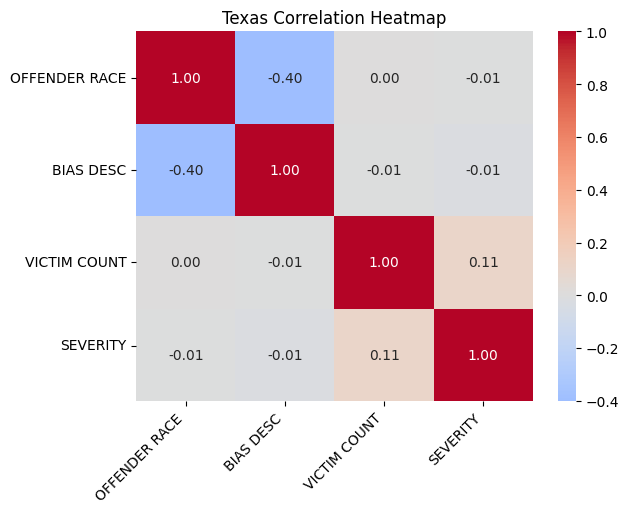

In [13]:
correlation_matrix2 = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Texas Correlation Heatmap')
labels = ['OFFENDER RACE','BIAS DESC','VICTIM COUNT','SEVERITY']
plt.xticks(ticks=[0.5,1.5,2.5,3.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4], labels=labels, ha='right')
plt.show()

([<matplotlib.axis.YTick at 0x2a606213190>,
 [Text(0, 0.5, 'OFFENDER_RACE'),
  Text(0, 1.5, 'BIAS_DESC'),
  Text(0, 2.5, 'VICTIM_COUNT'),
  Text(0, 3.4, 'SEVERITY')])

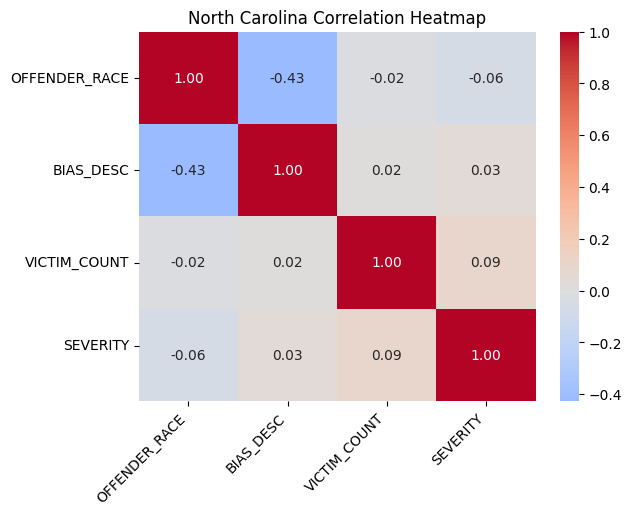

In [14]:
correlation_matrix2 = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('North Carolina Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY']
plt.xticks(ticks=[0.5,1.5,2.5,3.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4], labels=labels, ha='right')

([<matplotlib.axis.YTick at 0x2a6034d0c10>,
 [Text(0, 0.5, 'OFFENDER RACE'),
  Text(0, 1.5, 'BIAS DESC'),
  Text(0, 2.5, 'VICTIM COUNT'),
  Text(0, 3.4, 'SEVERITY')])

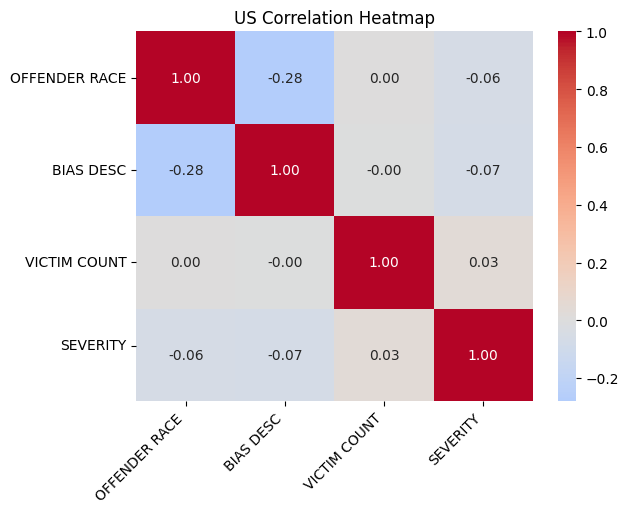

In [15]:
correlation_matrix2 = us_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('US Correlation Heatmap')
labels = ['OFFENDER RACE','BIAS DESC','VICTIM COUNT','SEVERITY']
plt.xticks(ticks=[0.5,1.5,2.5,3.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4], labels=labels, ha='right')

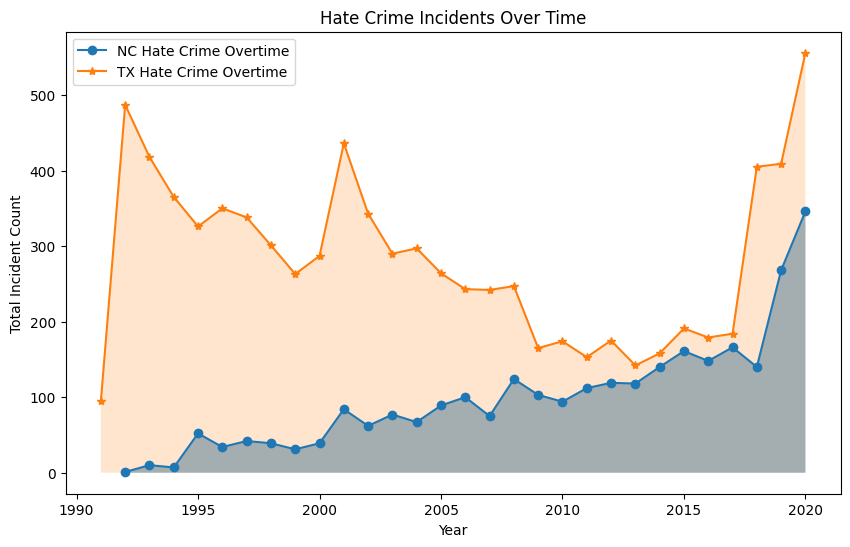

In [16]:
tx_filtered_data = tx_data[["DATA_YEAR", "INCIDENT_ID"]]
nc_filtered_data = nc_data[["DATA_YEAR", "INCIDENT_ID"]]

# Group by DATA_YEAR and calculate the sum of INCIDENT_ID for each year
nc_grouped = nc_filtered_data.groupby("DATA_YEAR").size()
tx_grouped = tx_filtered_data.groupby("DATA_YEAR").size()

# Add labels, title, and legend
plt.figure(figsize=(10, 6))
plt.plot(nc_grouped.index, nc_grouped.values, marker='o', label='NC Hate Crime Overtime')
plt.plot(tx_grouped.index, tx_grouped.values, marker='*', label='TX Hate Crime Overtime')
plt.fill_between(nc_grouped.index, nc_grouped.values, alpha=0.5)
plt.fill_between(tx_grouped.index, tx_grouped.values, alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Total Incident Count')
plt.title('Hate Crime Incidents Over Time')
plt.legend()

# Display the plot
plt.show()


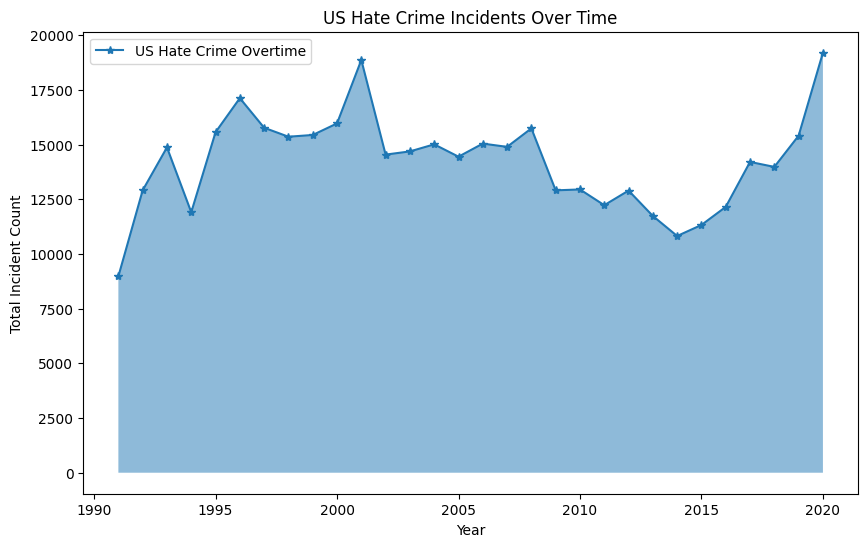

In [17]:
us_filtered_data = us_data[["DATA_YEAR", "INCIDENT_ID"]]

# Group by DATA_YEAR and calculate the sum of INCIDENT_ID for each year
us_grouped = us_filtered_data.groupby("DATA_YEAR").size()


# Add labels, title, and legend
plt.figure(figsize=(10, 6))
plt.plot(us_grouped.index, us_grouped.values, marker='*', label='US Hate Crime Overtime')
plt.fill_between(us_grouped.index, us_grouped.values, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Total Incident Count')
plt.title('US Hate Crime Incidents Over Time')
plt.legend()

# Display the plot
plt.show()

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(tx_data['OFFENDER_RACE'], tx_data['BIAS_DESC'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square value: 3213.859011125383
P-value: 0.0
Degrees of freedom: 300
Expected frequencies table:
[[2.68772840e-02 3.06495344e-02 2.35765649e-04 4.71531298e-04
  4.62100672e-02 7.07296947e-04 3.77225038e-03 7.29694683e-01
  4.71531298e-04 1.17882824e-03 4.71531298e-04 7.07296947e-04
  2.35765649e-04 2.35765649e-04 1.41459389e-03 7.07296947e-03
  1.41459389e-03 2.59342214e-03 2.35765649e-04 2.47553931e-01
  4.71531298e-04 4.71531298e-04 4.00801603e-03 1.41459389e-03
  9.43062596e-04 1.93327832e-01 2.35765649e-04 2.35765649e-04
  2.35765649e-04 2.35765649e-04 3.86655664e-02 2.35765649e-04
  9.85500413e-02 4.90392550e-02 5.68195214e-02 2.59342214e-03
  8.48756336e-03 2.35765649e-04 2.35765649e-04 3.58363786e-02
  2.35765649e-04 1.06094542e-02 2.35765649e-03 3.30071909e-03
  7.45019451e-02 2.05116115e-02 8.72332901e-03 1.55605328e-02
  1.03736886e-02 1.01379229e-02 2.49204291e-01]
 [6.85370741e-01 7.81563126e-01 6.01202405e-03 1.20240481e-02
  1.17835671e+00 1.80360721e-02 9.61923848e-0

In [19]:
contingency_table

BIAS_DESC,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
OFFENDER_RACE,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,3,0,0,14,0,0,...,0,0,1,6,1,0,0,0,0,7
2,16,3,0,0,32,0,6,37,0,0,...,3,5,0,47,7,8,3,5,16,659
3,0,1,0,0,4,0,2,41,0,0,...,1,0,0,6,1,2,2,1,3,20
4,31,48,0,1,66,2,4,974,0,0,...,29,2,8,125,57,12,45,21,3,189
5,66,78,1,1,91,1,4,2028,2,5,...,12,3,5,131,21,15,16,17,21,182
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
# Create a contingency table of the two categorical variables
contingency_table_us = pd.crosstab(us_data['OFFENDER_RACE'], us_data['BIAS_DESC'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table_us)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square value: 135255.21680157827
P-value: 0.0
Degrees of freedom: 1925
Expected frequencies table:
[[2.63189302e+01 1.69544322e-02 6.78177287e-02 ... 2.26059096e-02
  2.76617213e+02 1.13029548e-02]
 [3.38666715e+01 2.18166233e-02 8.72664930e-02 ... 2.90888310e-02
  3.55945481e+02 1.45444155e-02]
 [6.04910017e+02 3.89677915e-01 1.55871166e+00 ... 5.19570553e-01
  6.35772508e+03 2.59785277e-01]
 ...
 [2.06179860e+03 1.32819321e+00 5.31277285e+00 ... 1.77092428e+00
  2.16699150e+04 8.85462142e-01]
 [1.83255232e+03 1.18051470e+00 4.72205880e+00 ... 1.57401960e+00
  1.92604908e+04 7.87009799e-01]
 [4.36285623e-01 2.81051507e-04 1.12420603e-03 ... 3.74735343e-04
  4.58544903e+00 1.87367672e-04]]


In [21]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,1
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,1
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,1
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,1
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,1
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,1
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,1
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,1


In [22]:
incident_id = tx_data["INCIDENT_ID"]
offender_race = tx_data["OFFENDER_RACE"]
bias_desc = tx_data["BIAS_DESC"]

C:\Users\chris\AppData\Local\Temp\ipykernel_30292\2052569294.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=offender_race, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)


<Axes: title={'center': 'Offender Race v Incidents'}, xlabel='Offender Race', ylabel='Total Incident Count'>

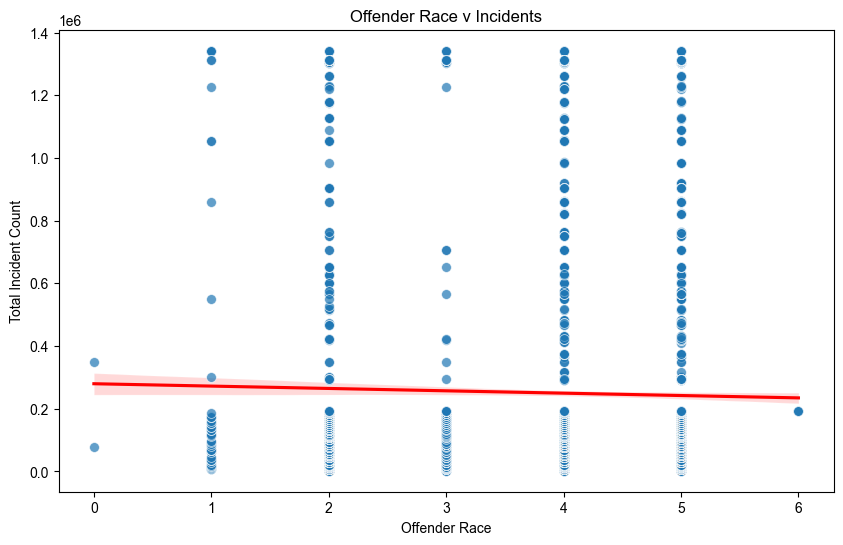

In [23]:
# Define your features and target variable
X = tx_data[['OFFENDER_RACE','BIAS_DESC']]
y = tx_data['INCIDENT_ID']  # Replace with your actual target variable

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # Create and fit
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

nc_coefficients = model.coef_
nc_intercept = model.intercept_

plt.figure(figsize=(10, 6))

sns.regplot(x = tx_data[['OFFENDER_RACE']], y = tx_data['INCIDENT_ID'], scatter=False, color='red')
#plt.xticks(rotation=90)
plt.xlabel('Offender Race')
plt.ylabel('Total Incident Count')
plt.title('Offender Race v Incidents')
sns.set(style='whitegrid')
sns.scatterplot(x=offender_race, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)



In [27]:
print("Coefficients:", nc_coefficients)
print("Intercept:", nc_intercept)

Coefficients: [6809.07171967 2220.10260407]
Intercept: 171324.51939137356


C:\Users\chris\AppData\Local\Temp\ipykernel_30292\2855698002.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=bias_desc, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)


Coefficients: [6809.07171967 2220.10260407]
Intercept: 171324.51939137356


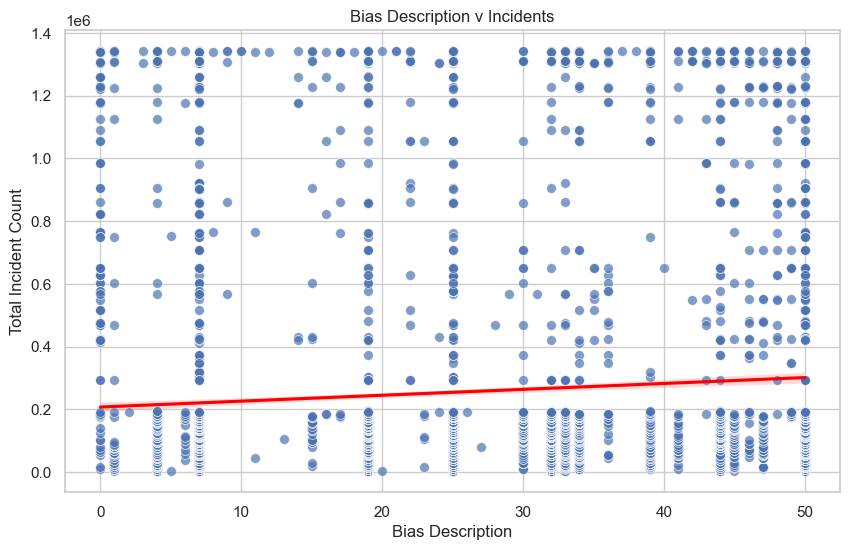

In [28]:
# Define your features and target variable
X = tx_data[['OFFENDER_RACE','BIAS_DESC']]
y = tx_data['INCIDENT_ID']  # Replace with your actual target variable

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # Create and fit
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tx_coefficients = model.coef_
tx_intercept = model.intercept_

plt.figure(figsize=(10, 6))
sns.regplot(x = tx_data[['BIAS_DESC']], y = tx_data['INCIDENT_ID'], scatter=False, color='red')
plt.xlabel('Bias Description')
plt.ylabel('Total Incident Count')
plt.title('Bias Description v Incidents')
#plt.xticks(rotation=90)
sns.set(style='whitegrid')
sns.scatterplot(x=bias_desc, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)

print("Coefficients:", tx_coefficients)
print("Intercept:", tx_intercept)